**2nd Custom CNN Model with Different node size**

In [ ]:
#Change input shape

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(224, 224,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
#Here we save the best model on our drive for storage
checkpoint_path = "drive/MyDrive/cpd.ckpt"
checkpoint_path = "cpd.ckpt"                # HASH THIS TO SAVE MODEL IN DRIVE
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


**Executed on 80 epochs**

In [ ]:
history = model.fit(x_train,y_train,epochs = 80 , validation_data = (x_val, y_val), callbacks=[cp_callback])

Epoch 1/80
273/273 [==============================] - 503s 2s/step - loss: 92.6625 - accuracy: 0.5593 - val_loss: 57.2706 - val_accuracy: 0.5824

Epoch 00001: saving model to cpd.ckpt
Epoch 2/80
273/273 [==============================] - 508s 2s/step - loss: 49.1615 - accuracy: 0.6360 - val_loss: 42.0184 - val_accuracy: 0.6323

Epoch 00002: saving model to cpd.ckpt
Epoch 3/80
273/273 [==============================] - 503s 2s/step - loss: 37.9727 - accuracy: 0.6609 - val_loss: 34.8794 - val_accuracy: 0.6627

Epoch 00003: saving model to cpd.ckpt
Epoch 4/80
273/273 [==============================] - 494s 2s/step - loss: 28.6947 - accuracy: 0.7041 - val_loss: 30.6182 - val_accuracy: 0.6925

Epoch 00004: saving model to cpd.ckpt
Epoch 5/80
273/273 [==============================] - 495s 2s/step - loss: 24.6205 - accuracy: 0.7243 - val_loss: 29.9318 - val_accuracy: 0.7064

Epoch 00005: saving model to cpd.ckpt
Epoch 6/80
273/273 [==============================] - 497s 2s/step - loss: 19.88

In [ ]:
model.save('drive/MyDrive/resizedmodel')

INFO:tensorflow:Assets written to: drive/MyDrive/resizedmodel/assets


**Loss analysis and Classification Report**

In [ ]:
Accuracy = []
Losses = []
Folds = KFold(n_splits=5, shuffle=True)
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

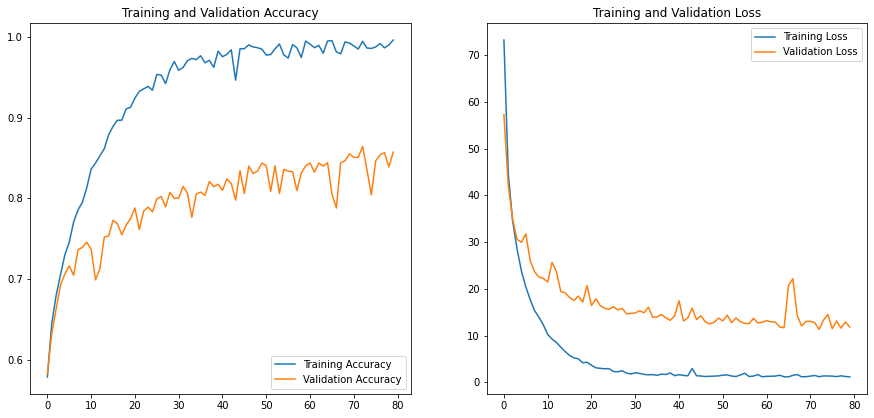

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)                        #CHANGE 50 as per the epochs

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions,target_names = ['NORMAL','COVID']))